In [1]:
# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [2]:
train_df = pd.read_excel('train.xlsx') # Load the `train` file

In [3]:
#!pip install stop_words

In [22]:
import re
from stop_words import get_stop_words

def special_char(text):
    """Retrieve the special characters
    """
    return re.sub(r'\W', ' ', text)

def filter_single(text):
    """remove all single characters
    """
    return re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

def filter_singleStart(text):
    """Remove single characters from the start
    """
    return re.sub(r'\^[a-zA-Z]\s+', '', text)

def filter_multiplespace(text):
    """Substituting multiple spaces with single space
    """
    return re.sub(r'\s+', ' ', text, flags=re.I)

def stop_words():
    """Retrieve the stop words for vectorization -Feel free to modify this function
    """
    return get_stop_words('es') + get_stop_words('ca') + get_stop_words('en')

def filter_mentions(text):
    """Utility function to remove the mentions of a tweet
    """
    return re.sub("@\S+", "", text)

def filter_hashtags(text):
    """Utility function to remove the hashtags of a tweet
    """
    return re.sub("#\S+", "", text)

def filter_symb_hashtag(text):
    """Utility function to remove the hashtags symbol of a tweet
    """
    return re.sub("#", "", text)

def filter_symb_mention(text):
    """Utility function to remove the hashtags symbol of a tweet
    """
    return re.sub("@", "", text)

def filter_symb1(text):
    """Utility function to remove special characters of a tweet
    """
    return re.sub(r'[(?¿!¡)]', "", text)

#def translate_text(text):
#    """Utility function to translate the text of a tweet
#    """
#    return translator.translate(text, dest='es').text

def lower_text(text):
    """Utility function to lower text
    """
    return text.lower()

def eliminate_numbers(text):
    """Utility function to lower text
    """
    return re.sub(r'\w*\d\w*', '', text).strip()

def eliminate_emojiis(text):
    """Utility to eliminate emojiis from the text
    """
    em_pat=re.compile("["
       u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return  em_pat.sub(r'',text)

In [16]:
# Translate text to spanish and define column (vector) with language (spa:0, cat:1)
#!pip install langdetect
from langdetect import detect 
train_df['language'] = [detect(row['text']) for index, row in train_df.iterrows()]

# language column to 1-0 --> esta columna lang_val la ponemos al final del array (Xvec)
train_df['lang_val'] = np.where(train_df.language == 'ca', 1, 0)
train_df.head(5)


,Id,username,party,text,created_at,retweet_count,favorite_count,language,lang_val,text1,text2,text3,text4,text5
0,0,martarovira,erc,Últim acte de campanya! Aquí tossudament alçat...,2017-12-19 20:12:01,785,2295,ca,1,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya quí tossudament alçatsa...
1,1,xavierdomenechs,comuns,#Badalona necessita uns pressupostos que posin...,2018-04-27 10:04:19,55,93,ca,1,#Badalona necessita uns pressupostos que posin...,Badalona necessita uns pressupostos que posin ...,#Badalona necessita uns pressupostos que posin...,Badalona necessita uns pressupostos que posin ...,adalona necessita uns pressupostos que posin l...
2,2,albert_rivera,cs,Encuentro Villacís-Valls para lanzar una estra...,2018-11-17 20:34:58,357,622,es,0,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,ncuentro illacís-alls para lanzar una estrateg...
3,3,jaumecollboni,psc,"“La palabra es como una bala, no tiene retorno...",2018-10-22 18:10:01,4,6,es,0,"“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...",“a palabra es como una bala no tiene retorno” ...
4,4,albiol_xg,ppc,"📻 Esta noche, a partir de las 22:10h, me entre...",2018-08-16 10:30:27,20,47,es,0,"📻 Esta noche,partir de las 22:10h, me entrevis...","📻 Esta noche,partir de las 22:10h, me entrevis...","📻 Esta noche,partir de las 22:10h, me entrevis...","📻 Esta noche,partir de las 22:10h, me entrevis...",📻 sta nochepartir de las 2210h me entrevistan ...


### Pre-Processing (1-3 fets)
1) eliminate symbols :,?¿!';-
2) eliminate single characters  
2b) numbers (eliminate numbers and words with numbers)  
3) all to lower  
4) accents? (amb unidecode, pero passa ç a c, ñ a n, aixo introdueix errors?)  
5) i is fessim una columna amb 0-1 indicant si hi ha emoji? (sigui com sigui, pero algu potser els fa servir bastant?)
6) segurament, si hi ha hashtag del partit l'ha posat el mateix partit (publicitat)

In [67]:
train_df['text1'] = [(filter_single(filter_singleStart(row['text']))) for index, row in train_df.iterrows()]
train_df['text2'] = [(filter_single(filter_singleStart(filter_symb_hashtag(row['text'])))) for index, row in train_df.iterrows()]
train_df['text3'] = [(filter_single(filter_singleStart(filter_symb_mention(row['text'])))) for index, row in train_df.iterrows()]
train_df['text4'] = [(filter_single(filter_singleStart(filter_symb_hashtag(filter_symb_mention(row['text']))))) for index, row in train_df.iterrows()]
train_df['text5'] = [(filter_single(filter_singleStart(filter_symb_hashtag(filter_symb_mention(filter_symb1(row['text'])))))) for index, row in train_df.iterrows()]
train_df['text6'] = [(filter_single(filter_singleStart(filter_symb_hashtag(filter_symb_mention(filter_symb1(eliminate_numbers(row['text']))))))) for index, row in train_df.iterrows()]



train_df.head(5)

,Id,username,party,text,created_at,retweet_count,favorite_count,language,lang_val,text1,text2,text3,text4,text5,text6
0,0,martarovira,erc,Últim acte de campanya! Aquí tossudament alçat...,2017-12-19 20:12:01,785,2295,ca,1,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya Aquí tossudament alçats...,Últim acte de campanya Aquí tossudament alçats...
1,1,xavierdomenechs,comuns,#Badalona necessita uns pressupostos que posin...,2018-04-27 10:04:19,55,93,ca,1,#Badalona necessita uns pressupostos que posin...,Badalona necessita uns pressupostos que posin ...,#Badalona necessita uns pressupostos que posin...,Badalona necessita uns pressupostos que posin ...,Badalona necessita uns pressupostos que posin ...,Badalona necessita uns pressupostos que posin ...
2,2,albert_rivera,cs,Encuentro Villacís-Valls para lanzar una estra...,2018-11-17 20:34:58,357,622,es,0,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...
3,3,jaumecollboni,psc,"“La palabra es como una bala, no tiene retorno...",2018-10-22 18:10:01,4,6,es,0,"“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno..."
4,4,albiol_xg,ppc,"📻 Esta noche, a partir de las 22:10h, me entre...",2018-08-16 10:30:27,20,47,es,0,"📻 Esta noche, partir de las 22:10h, me entrevi...","📻 Esta noche, partir de las 22:10h, me entrevi...","📻 Esta noche, partir de las 22:10h, me entrevi...","📻 Esta noche, partir de las 22:10h, me entrevi...","📻 Esta noche, partir de las 22:10h, me entrevi...","📻 Esta noche, partir de las :, me entrevistan ..."


In [24]:
p=1
print (train_df.text[p], '\n ----\n')
print (train_df.text1[p], '\n ----\n')
print (train_df.text2[p], '\n ----\n')
print (train_df.text3[p], '\n ----\n')
print (train_df.text4[p], '\n ----\n')

#Badalona necessita uns pressupostos que posin la ciutadania al capdavant i que segueixin recuperant els drets socials que les retallades del PP van eliminar. La transformació a Badalona no es pot aturar. Per això, tot el suport a @mariadolorsa.  

#DolorsAlcaldessa 
 ----

#Badalona necessita uns pressupostos que posin la ciutadania al capdavant que segueixin recuperant els drets socials que les retallades del PP van eliminar. La transformació Badalona no es pot aturar. Per això, tot el suport @mariadolorsa.  

#DolorsAlcaldessa 
 ----

Badalona necessita uns pressupostos que posin la ciutadania al capdavant que segueixin recuperant els drets socials que les retallades del PP van eliminar. La transformació Badalona no es pot aturar. Per això, tot el suport @mariadolorsa.  

DolorsAlcaldessa 
 ----

#Badalona necessita uns pressupostos que posin la ciutadania al capdavant que segueixin recuperant els drets socials que les retallades del PP van eliminar. La transformació Badalona no es 

### Afegim una columna amb idioma
tot i que alguns resultats ens han mostrat pitjors scores

### Fem un analisi de PCA (Manifold) i mirem si hi ha algun grup estrany

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Manifold plot

In [68]:
vectorizer= TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features=8000, stop_words=stop_words())
X_tot = vectorizer.fit_transform(train_df['text']).toarray()
y_tot = train_df['party'].values


In [216]:
from sklearn import manifold
n_components = 2
perplexity = 20
tsne = manifold.TSNE(n_components=n_components, init='random',random_state=0, perplexity=perplexity)
X_tsne = tsne.fit_transform(X_tot)
b,w = np.unique(y_tot.tolist(), return_inverse=True)


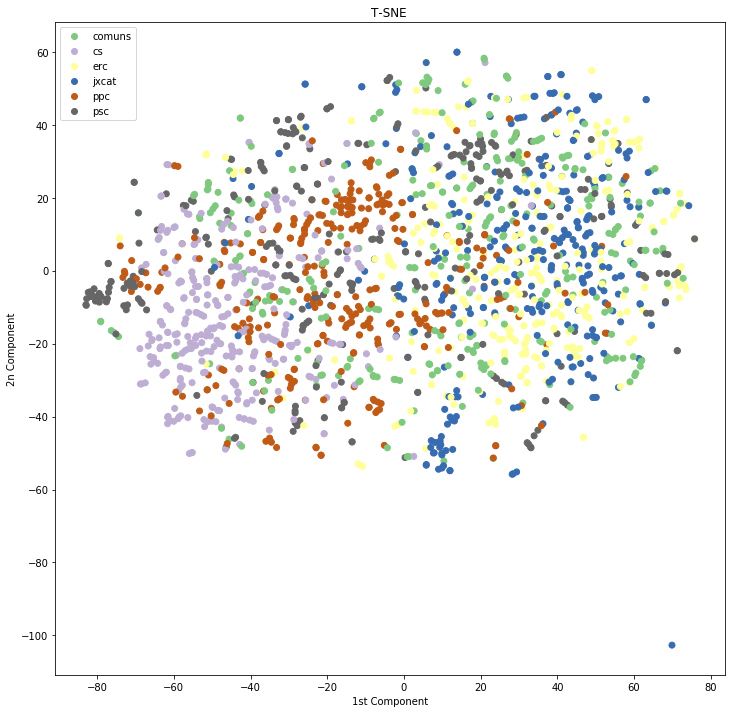

In [217]:
import matplotlib.cm as cm
#With TSNE
plt.figure(figsize=(12,12))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1],c=w,cmap=cm.get_cmap('Accent'))
plt.title("T-SNE ")
plt.xlabel("1st Component")
plt.ylabel("2n Component")

#añadir leyenda (ni puta idea que fa aqui)
labels = np.unique(w)
labels2= b
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels2,loc='best')
plt.show()

In [80]:
# PC1
a1=X_tsne[:,0]>40
a2=X_tsne[:,1]>0
a3=X_tsne[:,1]<30
kk=X_tsne[:,0]

k=kk.tolist()
a11=a1.tolist()
a22=a2.tolist()
a33=a3.tolist()

for index , i in enumerate(k):
    if a11[index]==True & a22[index]==True & a33[index]==True:
        print(index)
        print (train_df['text'][index])
        print( 'PARTIT: --->   ', train_df['party'][index])
        print ('\n .................... \n')

21
One year ago BCN suffered one of the worst attacks in its history.They hurt us deeply, but they didn't infect us with their hatred.We're a city of peace proud of our diversity. Tomorrow is a day to express our solidarity with the victims and loved ones with tenderness and respect 
PARTIT: --->    comuns

 .................... 

115
More than 50% of global population lives in cities and produce almost the 65% of the world’s GDP. Our mission is to make sure that we can face global challenges through an urban agenda. Welcome to the @SmartCityexpo #CitiesToLiveIn 🌿🌎 
PARTIT: --->    psc

 .................... 

149
On behalf of the Catalan people, I express my strongest condemnation of yesterday’s anti-semitic attack in Pittsburgh and would like to extend my deepest condolences to the family members and the Jewish community of the Tree of Life Synagogue 
PARTIT: --->    jxcat

 .................... 

167
En el @parlamentcat he recibido al exministro, Diputado de Ecuador y Presidente de 

sembla que tots els textos de jxcat son en angles....
i si eliminem idiomes que no siguin catala i castella???

In [26]:
train_df['language'].value_counts()

ca    1044
es     837
en      32
fr       4
it       2
et       1
Name: language, dtype: int64

In [227]:
print (train_df.loc[train_df['language']=='tl'])

        Id       username  party  \
1336  1336  quimtorraipla  jxcat   

                                                   text          created_at  \
1336  Mila esker hitzaldia emateko gonbidapenagatik,... 2018-10-30 16:16:19   

      retweet_count  favorite_count language  lang_val  traduc  \
1336            173             408       tl         0     NaN   

                                             text_clean  
1336  Mila esker hitzaldia emateko gonbidapenagatik,...  


In [226]:
print (train_df.loc[train_df['language']=='it'])

        Id  username   party  \
326    326      krls   jxcat   
1126  1126  adacolau  comuns   

                                                   text          created_at  \
326   Interessant article: OPINIÓN | Corporativismo ... 2018-08-26 07:46:15   
1126  Ministro @matteosalvinimi questi sono i suoi a... 2018-07-17 11:10:54   

      retweet_count  favorite_count language  lang_val  traduc  \
326            1242            2247       it         0     NaN   
1126            438             731       it         0     NaN   

                                             text_clean  
326   Interessant article: OPINIÓN | Corporativismo ...  
1126  Ministro @matteosalvinimi questi sono suoi ami...  


In [228]:
print (train_df.loc[train_df['language']=='fr'])

        Id  username   party  \
617    617      krls   jxcat   
680    680      krls   jxcat   
1099  1099      krls   jxcat   
1503  1503  adacolau  comuns   

                                                   text          created_at  \
617   On ne va pas juger des criminals, on va juger ... 2018-09-25 19:09:36   
680   Perpignan: Vasi pour l’Image, ou «la révolte d... 2018-08-19 19:16:55   
1099  Tous les peuples ont le droit à l'autodétermin... 2018-09-25 14:47:42   
1503  Avec @Anne_hidalgo et Paris nous partageons dé... 2018-07-11 15:33:33   

      retweet_count  favorite_count language  lang_val  traduc  \
617            1768            3803       fr         0     NaN   
680            1499            2942       fr         0     NaN   
1099           2130            4623       fr         0     NaN   
1503             53             127       fr         0     NaN   

                                             text_clean  
617   On ne va pas juger des criminals, on va juger ..

In [27]:
print (train_df.loc[train_df['language']=='en'])

        Id         username   party  \
21      21         adacolau  comuns   
115    115    jaumecollboni     psc   
149    149    quimtorraipla   jxcat   
179    179             krls   jxcat   
245    245             krls   jxcat   
351    351    quimtorraipla   jxcat   
503    503             krls   jxcat   
570    570             krls   jxcat   
589    589             krls   jxcat   
739    739         adacolau  comuns   
742    742             krls   jxcat   
843    843             krls   jxcat   
863    863             krls   jxcat   
868    868             krls   jxcat   
972    972      martarovira     erc   
996    996             krls   jxcat   
1001  1001    quimtorraipla   jxcat   
1021  1021             krls   jxcat   
1026  1026             krls   jxcat   
1074  1074  xavierdomenechs  comuns   
1176  1176             krls   jxcat   
1185  1185    inesarrimadas      cs   
1186  1186    quimtorraipla   jxcat   
1493  1493    jaumecollboni     psc   
1558  1558             kr

In [69]:
train2_df = train_df.loc[(train_df['language'] == 'ca') | (train_df['language'] == 'es')]
#print (train2_df.head())

In [70]:
train3_df = train_df[ (train_df['language'] != 'en') | (train_df['party'] != 'jxcat') ]
print (train3_df['language'].value_counts())
print (train3_df['party'].value_counts())

ca    1044
es     837
en       8
fr       4
it       2
et       1
Name: language, dtype: int64
ppc       322
erc       321
comuns    320
psc       319
cs        319
jxcat     295
Name: party, dtype: int64


In [71]:
train4_df = train3_df[ (train3_df['language'] != 'et')]
print (train4_df['language'].value_counts())
print (train4_df['party'].value_counts())

ca    1044
es     837
en       8
fr       4
it       2
Name: language, dtype: int64
ppc       322
erc       321
comuns    320
psc       319
cs        319
jxcat     294
Name: party, dtype: int64


In [72]:
train5_df = train4_df[ (train4_df['language'] != 'it')]
print (train5_df['language'].value_counts())
print (train5_df['party'].value_counts())

ca    1044
es     837
en       8
fr       4
Name: language, dtype: int64
ppc       322
erc       321
psc       319
cs        319
comuns    319
jxcat     293
Name: party, dtype: int64


In [54]:
print(train_df['text2'][2])

Encuentro Villacís-Valls para lanzar una estrategia electoral común en Madrid Barcelona 


In [76]:
from sklearn.naive_bayes import MultinomialNB

Xvec = vectorizer.fit_transform(train2_df['text6']).toarray()
yvec = train2_df['party'].values

X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )

clf = MultinomialNB().fit(X_train, y_train)

prediction_train = clf.predict(X_train)
prediction = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

[[31 11  5  9  2  4]
 [ 1 50  0  0  0  1]
 [ 3  1 50 10  2  0]
 [ 3  1 11 42  1  0]
 [ 0  5  3  0 60  1]
 [ 9 11  8  4  2 36]]
             precision    recall  f1-score   support

     comuns       0.66      0.50      0.57        62
         cs       0.63      0.96      0.76        52
        erc       0.65      0.76      0.70        66
      jxcat       0.65      0.72      0.68        58
        ppc       0.90      0.87      0.88        69
        psc       0.86      0.51      0.64        70

avg / total       0.73      0.71      0.71       377

0.713527851458886


In [263]:
from sklearn.linear_model import SGDClassifier

Xvec = vectorizer.fit_transform(train4_df['text_clean']).toarray()
yvec = train4_df['party'].values

X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )

clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-5, max_iter=80)

clf.fit(X_train, y_train)

prediction_train = clf.predict(X_train)
prediction = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


[[42  3  4 10  5  9]
 [ 2 55  0  2  1  5]
 [ 2  0 44 13  1  1]
 [ 5  0 10 42  1  0]
 [ 2  3  1  4 47  1]
 [ 2  4  3  8  3 44]]
              precision    recall  f1-score   support

      comuns       0.76      0.58      0.66        73
          cs       0.85      0.85      0.85        65
         erc       0.71      0.72      0.72        61
       jxcat       0.53      0.72      0.61        58
         ppc       0.81      0.81      0.81        58
         psc       0.73      0.69      0.71        64

   micro avg       0.72      0.72      0.72       379
   macro avg       0.73      0.73      0.73       379
weighted avg       0.74      0.72      0.72       379

0.7229551451187335


In [129]:
from sklearn.svm import LinearSVC
#vectorizer= TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features=8000, stop_words=stop_words())
vectorizer= TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features=7000, stop_words=stop_words())

Xvec = vectorizer.fit_transform(train4_df['text']).toarray()
yvec = train4_df['party'].values

X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )


clf = LinearSVC(dual=False, C=1, fit_intercept=True, intercept_scaling=0.1, penalty='l2' )

#clf = LinearSVC(dual=False, C=10, fit_intercept=True, intercept_scaling=0.00001, penalty='l2' )
clf.fit(X_train, y_train)

prediction_train = clf.predict(X_train)
prediction = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

[[54  5  3  4  2  5]
 [ 3 57  0  0  1  4]
 [ 4  0 45 10  2  0]
 [ 4  1 11 41  1  0]
 [ 3  4  1  3 47  0]
 [ 4  7  3  4  2 44]]
             precision    recall  f1-score   support

     comuns       0.75      0.74      0.74        73
         cs       0.77      0.88      0.82        65
        erc       0.71      0.74      0.73        61
      jxcat       0.66      0.71      0.68        58
        ppc       0.85      0.81      0.83        58
        psc       0.83      0.69      0.75        64

avg / total       0.76      0.76      0.76       379

0.7598944591029023


In [122]:
from sklearn.linear_model import LogisticRegression

Xvec = vectorizer.fit_transform(train2_df['text']).toarray()
yvec = train2_df['party'].values

X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )


clf = LogisticRegression(C= 10, dual=True, fit_intercept= True, penalty= 'l2', solver= 'liblinear', tol= 0.0001)

#clf = LinearSVC(dual=False, C=10, fit_intercept=True, intercept_scaling=10, penalty='l2' )
clf.fit(X_train, y_train)

prediction_train = clf.predict(X_train)
prediction = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

[[36  6  5  6  1  8]
 [ 3 47  0  0  1  1]
 [ 4  1 49 10  0  2]
 [ 4  0  8 43  1  2]
 [ 0  5  3  0 59  2]
 [ 7  7  3  3  1 49]]
             precision    recall  f1-score   support

     comuns       0.67      0.58      0.62        62
         cs       0.71      0.90      0.80        52
        erc       0.72      0.74      0.73        66
      jxcat       0.69      0.74      0.72        58
        ppc       0.94      0.86      0.89        69
        psc       0.77      0.70      0.73        70

avg / total       0.75      0.75      0.75       377

0.7506631299734748


In [ ]:
# The model Linear SVC: Linear Support Vector Classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Split train and test
#X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20)
pred_train = [] 
pred_test = [] 
Xvec = vectorizer.fit_transform(train4_df['text_clean']).toarray()
yvec = train4_df['party'].values

#X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )
for i in range(100): # entre 10 y 50...aleatorio total.
    X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20)


    # My Model
    #clf = LinearSVC(dual=False, C=1, fit_intercept=True, intercept_scaling=0.1, penalty='l2' )
    clf = LogisticRegressionCV()

    
    clf.fit(X_train, y_train)
   

    prediction_train = clf.predict(X_train)
    prediction = clf.predict(X_test)

    pred_train.append(np.mean([prediction_train == y_train]))
    pred_test.append(np.mean([prediction == y_test])) 


plt.plot(pred_train)
plt.plot(pred_test)
plt.title('Linear SVC with Tdfidf and stop words')
plt.show()

plt.hist(pred_test)
print('pred_train: mean = ', np.mean(pred_train), ' max = ', np.max(pred_train),  ' min = ', np.min(pred_train), )
print('pred_test: mean = ', np.mean(pred_test), ' max = ', np.max(pred_test), ' min = ', np.min(pred_test), )

/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 t

In [ ]:
!pip install bokeh
from bokeh.plotting import figure, show

In [ ]:
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(100*X_tsne[:,0], 2*X_tsne[:,1])
]

p=figure(plot_width=800, plot_height=400)
p.scatter(X_tsne[:,0], X_tsne[:,1],color='inferno',fill_alpha=.2)
show(p)

In [ ]:
clf=LinearSVC(C=1, dual=False, fit_intercept=True, intercept_scaling=10,penalty='l2',)
clf.fit(Xvec,y_train)
clf.predict(Xvec_test)

print ("score = %3.2f" %(clf.score(Xvec_test,y_test)) )